In [548]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [549]:
pathTrainData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/train.csv'
pathTestData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/test.csv'
helpTestDance = '../html2023-spring-final-project-stage-2/test_partial_answer.csv'

In [550]:
train = pd.read_csv(pathTrainData)
test = pd.read_csv(pathTestData)
partialAnswer = pd.read_csv(helpTestDance)
print(partialAnswer.shape)

(631, 2)


Join train and test in total

In [551]:
total = pd.concat((train, test), axis=0)

Merge data Danceability by id

In [552]:
total.loc[total['id'].isin(partialAnswer['id']), 'Danceability'] = partialAnswer['Danceability']

In [553]:
total.set_index('id', inplace= True)

In [554]:
total.drop(columns=['Uri', 'Url_youtube', 'Description', 'Title', 'Artist', 'Album', 'Track', "official_video", "Licensed"], inplace=True)

In [555]:
total.head(3)

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Url_spotify,Comments,Channel,Composer
id,,,,,,,,,,,,,,,,,,,
0,0.0,0.000273,3.0,-25.176,0.0443,0.724151,0.000062,0.000807,0.340,83.398,117907.0,NaN,137622.0,19981370.0,album,https://open.spotify.com/artist/2QOIawHpSlOwXD...,3070.0,Mozafunkula,NaN
1,0.0,0.184220,7.0,NaN,NaN,0.672221,0.910000,0.034966,0.746,148.692,173427.0,184825.0,5190.0,NaN,NaN,https://open.spotify.com/artist/2QOIawHpSlOwXD...,122.0,Anton Paisov,Finneas O'Connell
2,0.0,NaN,6.0,-15.596,NaN,0.667628,0.867000,0.001772,0.380,84.899,150667.0,184825.0,5190.0,19320810.0,NaN,https://open.spotify.com/artist/2QOIawHpSlOwXD...,122.0,Anton Paisov,Finneas O'Connell


In [556]:
total.Album_type.unique()

array(['album', nan, 'single', 'compilation'], dtype=object)

In [557]:
def is_nan(x):
    if type(x) == float:
        if np.isnan(x):
            return True
        else:
            return False

def LabelEncoding(data):
    k = data.unique()
    nlabel = {}
    for i, label in enumerate(k):
        if not is_nan(label):
            nlabel[label] = int(i)#f'{i}'
    return nlabel


In [558]:
labels = {} 
labels['Album_type'] = LabelEncoding(total.Album_type)
labels['Url_spotify'] = LabelEncoding(total.Url_spotify)
labels['Channel'] = LabelEncoding(total.Channel)
labels['Composer'] = LabelEncoding(total.Composer)


In [559]:
total['Album_type'] = total['Album_type'].replace(labels['Album_type'])
total['Url_spotify'] = total['Url_spotify'].replace(labels['Url_spotify'])
total['Channel'] = total['Channel'].replace(labels['Channel'])
total['Composer'] = total['Composer'].replace(labels['Composer'])

In [560]:
total['Composer']

id
0        NaN
1        1.0
2        1.0
3        2.0
4        3.0
        ... 
23480    6.0
23481    7.0
23482    4.0
23483    7.0
23484    3.0
Name: Composer, Length: 23485, dtype: float64

In [473]:
# total['Album_type'] = total['Album_type'].astype('category')
# total['Url_spotify'] = total['Url_spotify'].astype('category')
# total['Channel'] = total['Channel'].astype('category')
# total['Composer'] = total['Composer'].astype('category')

# total['Key']=total['Key'].astype(str).str.rstrip('.0').astype('category')

In [474]:
total.head(3)

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Url_spotify,Comments,Channel,Composer
id,,,,,,,,,,,,,,,,,,,
0,0.0,0.000273,3,-25.176,0.0443,0.724151,0.000062,0.000807,0.340,83.398,117907.0,NaN,137622.0,19981370.0,0,0,3070.0,0,NaN
1,0.0,0.184220,7,NaN,NaN,0.672221,0.910000,0.034966,0.746,148.692,173427.0,184825.0,5190.0,NaN,NaN,0,122.0,1,1
2,0.0,NaN,6,-15.596,NaN,0.667628,0.867000,0.001772,0.380,84.899,150667.0,184825.0,5190.0,19320810.0,NaN,0,122.0,1,1


In [300]:
total.corr()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Comments
Danceability,1.000000,0.048215,0.034132,0.275222,0.228473,-0.309605,-0.231177,-0.084601,0.424102,-0.099890,-0.092154,0.097311,0.103480,0.075620,0.045531
Energy,0.048215,1.000000,0.030984,0.521536,0.035105,-0.429359,-0.162493,0.122516,0.288740,0.139002,0.008672,0.048940,0.046533,0.026511,0.033764
Key,0.034132,0.030984,1.000000,0.028663,0.021740,-0.034132,-0.005333,0.006171,0.044836,0.017334,-0.005898,0.014882,0.015647,0.000474,0.007641
Loudness,0.275222,0.521536,0.028663,1.000000,0.061853,-0.586900,-0.523715,0.035705,0.301555,0.132533,0.003268,0.116236,0.128086,0.125085,0.051786
Speechiness,0.228473,0.035105,0.021740,0.061853,1.000000,-0.129310,-0.090352,0.029526,0.057229,0.053713,-0.061945,-0.015586,0.009462,-0.019951,0.009479
Acousticness,-0.309605,-0.429359,-0.034132,-0.586900,-0.129310,1.000000,0.396090,-0.033404,-0.277558,-0.126865,-0.017521,-0.078645,-0.081835,-0.099861,-0.036693
Instrumentalness,-0.231177,-0.162493,-0.005333,-0.523715,-0.090352,0.396090,1.000000,-0.022980,-0.262821,-0.080309,0.005642,-0.092611,-0.092769,-0.105477,-0.034278
Liveness,-0.084601,0.122516,0.006171,0.035705,0.029526,-0.033404,-0.022980,1.000000,0.024289,0.005084,-0.002284,-0.007163,-0.017636,-0.040066,-0.013339
Valence,0.424102,0.288740,0.044836,0.301555,0.057229,-0.277558,-0.262821,0.024289,1.000000,0.097350,-0.053227,0.044711,0.028246,0.003496,0.017096
Tempo,-0.099890,0.139002,0.017334,0.132533,0.053713,-0.126865,-0.080309,0.005084,0.097350,1.000000,-0.021609,0.003878,0.006600,0.009532,0.006013


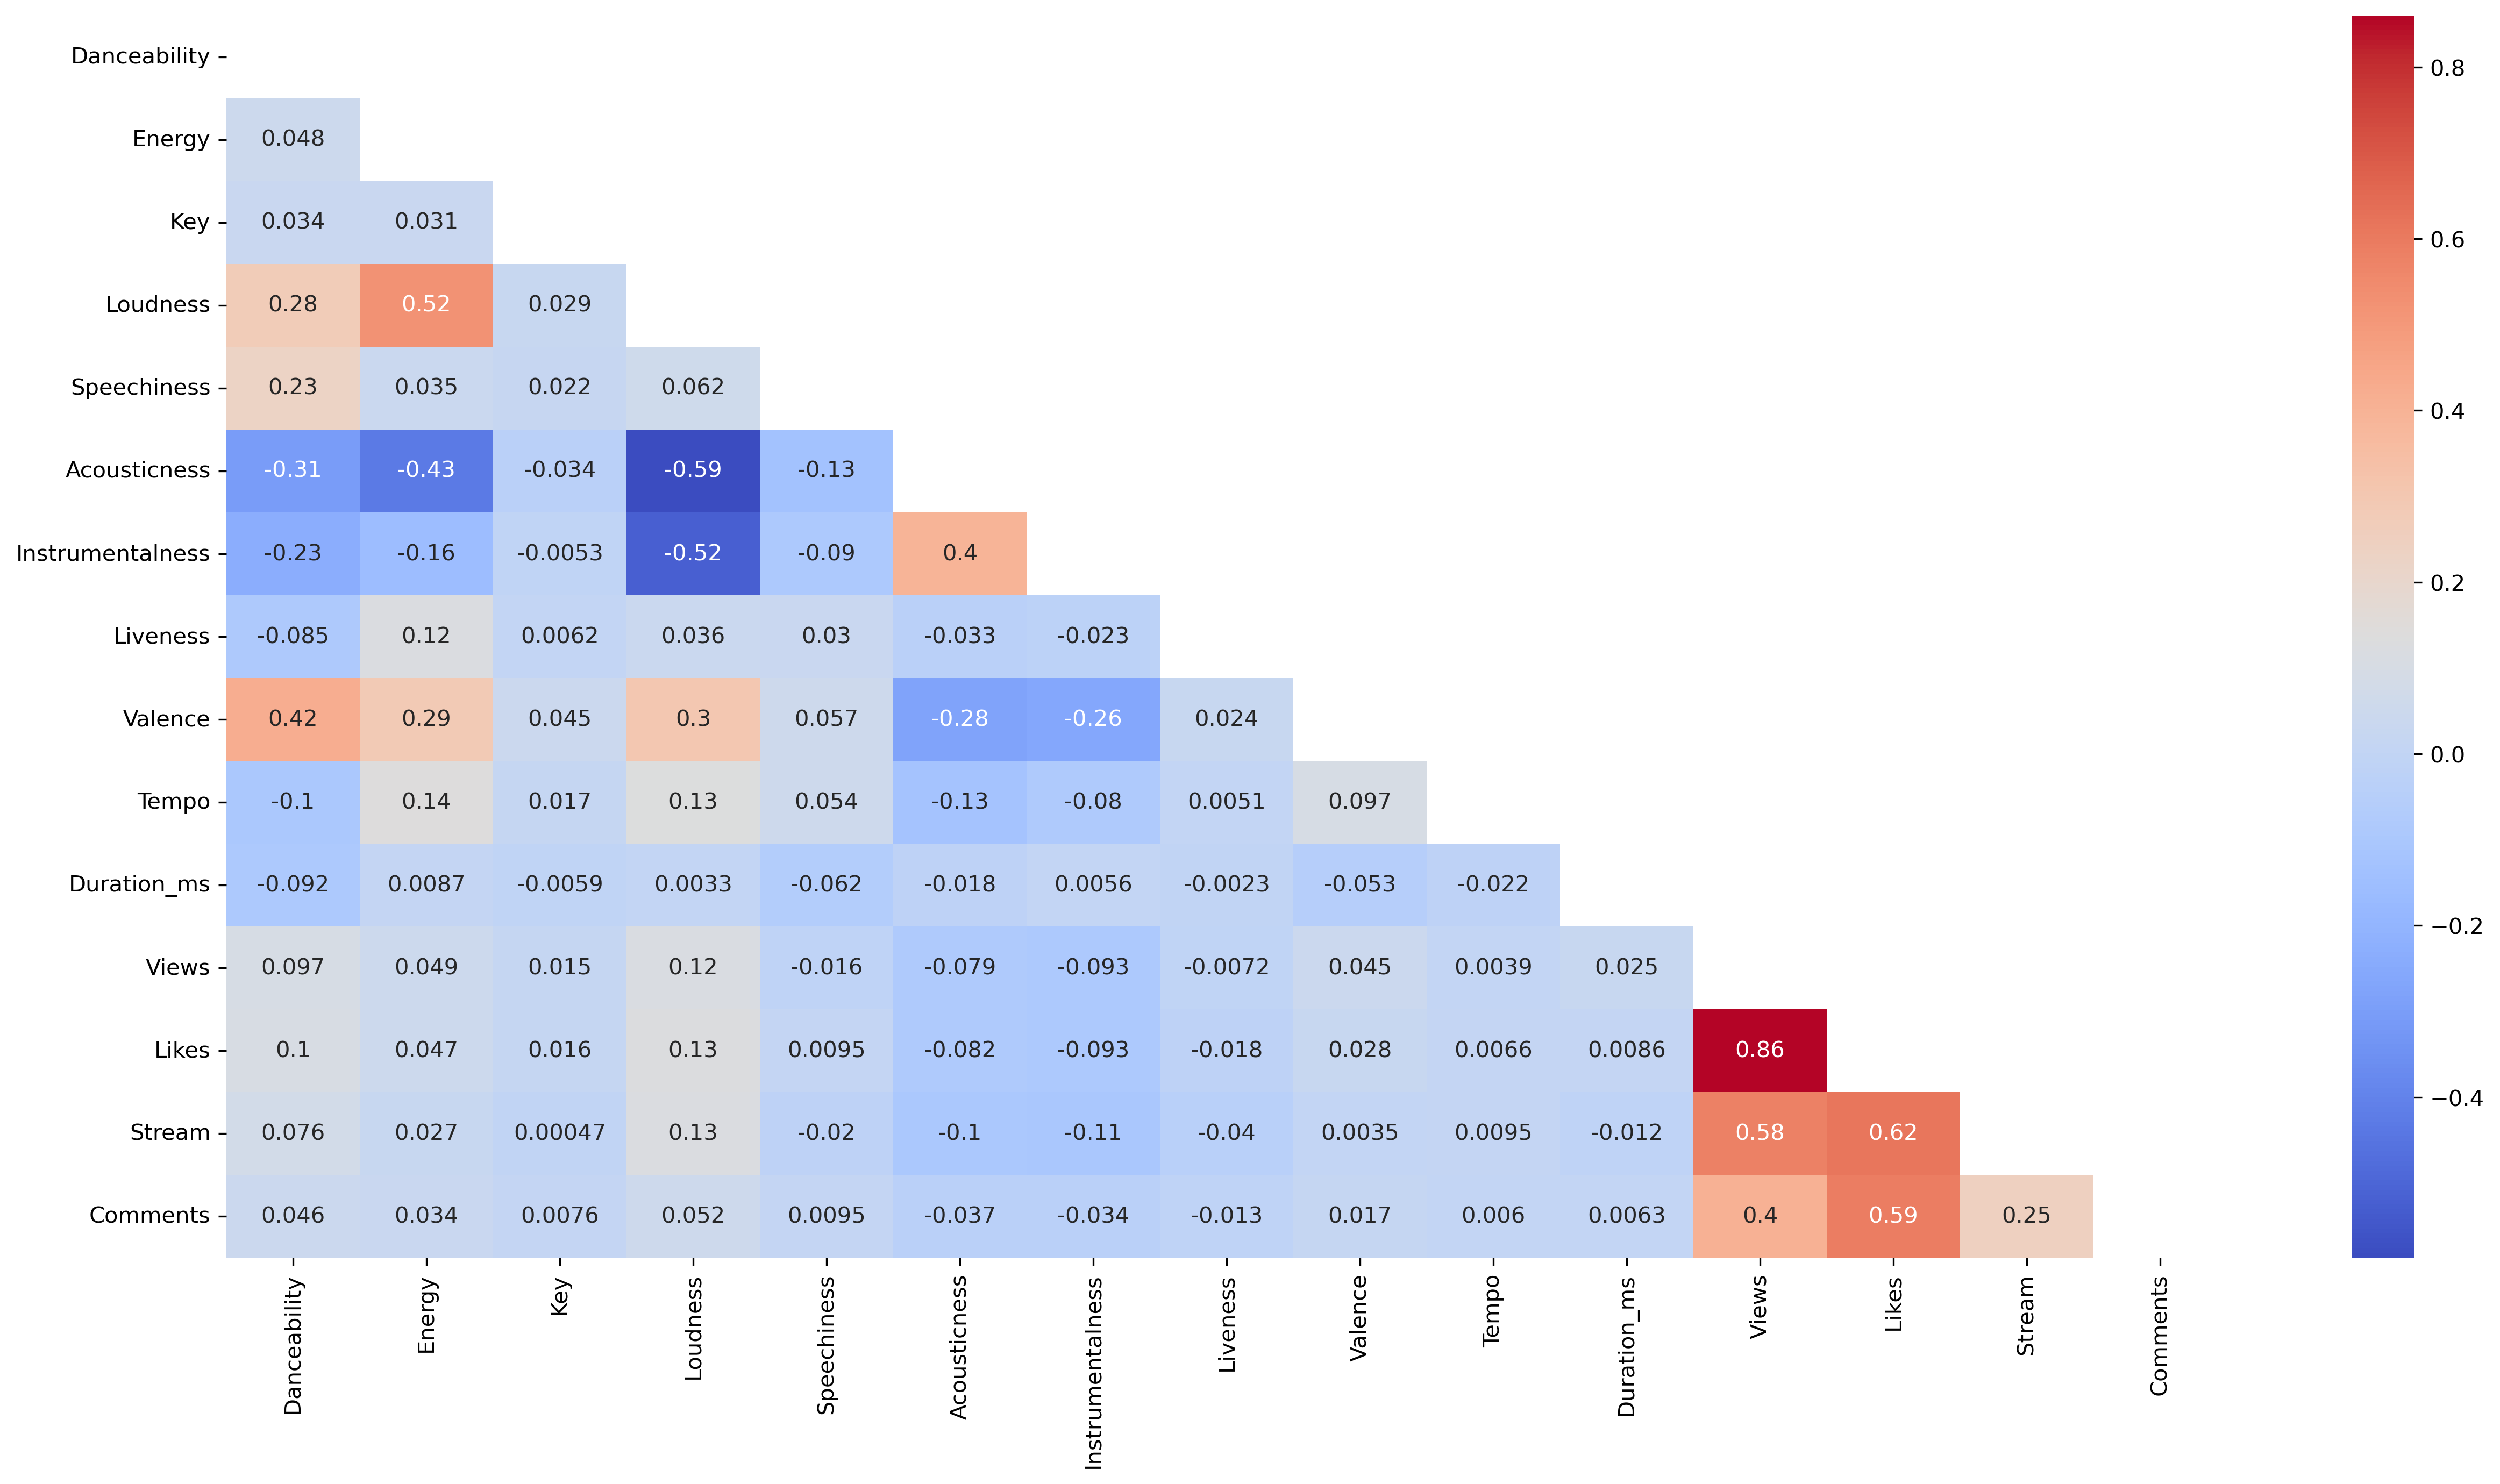

In [301]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(total.corr()))
dataplot = sns.heatmap(total.corr(), cmap="coolwarm", annot=True, mask=mask)

In [302]:
total.isnull().sum(0)

Danceability        6315
Energy              3523
Key                 3523
Loudness            3523
Speechiness         3523
Acousticness        3523
Instrumentalness    3523
Liveness            3523
Valence             3523
Tempo               3523
Duration_ms         3523
Views               3523
Likes               3523
Stream              3523
Album_type          3523
Url_spotify         3523
Comments            3523
Channel             3523
Composer            3523
dtype: int64

TEST DATA

In [303]:
testTotalData = total.copy()
testTotalData.drop(['Danceability'], axis=1, inplace=True)

In [304]:
testTotalData.isnull().sum(0)

Energy              3523
Key                 3523
Loudness            3523
Speechiness         3523
Acousticness        3523
Instrumentalness    3523
Liveness            3523
Valence             3523
Tempo               3523
Duration_ms         3523
Views               3523
Likes               3523
Stream              3523
Album_type          3523
Url_spotify         3523
Comments            3523
Channel             3523
Composer            3523
dtype: int64

In [305]:
ValenceTestData = testTotalData[testTotalData["Valence"].isna()]
ValenceTest_X = ValenceTestData.loc[:, ~ValenceTestData.columns.isin(['Valence'])]
testTotalData = testTotalData.dropna(axis=0, how="any", subset=["Valence"])

In [380]:
ValenceTestData

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Url_spotify,Comments,Channel,Composer
id,,,,,,,,,,,,,,,,,,
3,0.209585,NaN,-6.251000,0.027700,0.003796,NaN,0.001000,NaN,150.220000,265000.000000,2.024573e+08,9.970350e+05,3.996619e+08,0.0,1.0,24350.0,2.0,2.0
6,0.225867,10.0,NaN,0.032300,0.291434,0.000011,0.010794,NaN,166.668000,258027.000000,7.675819e+07,2.523800e+05,1.363324e+08,0.0,1.0,6860.0,2.0,1.0
15,0.003375,NaN,-22.415000,0.035500,0.944076,0.940000,0.001861,NaN,134.311000,89601.000000,8.695000e+04,9.550000e+02,8.273038e+06,0.0,3.0,7.0,6.0,2.0
36,0.052314,8.0,-6.665000,0.039900,0.246492,0.000000,0.001331,NaN,NaN,143531.000000,2.876944e+06,NaN,3.910902e+07,0.0,5.0,2971.0,15.0,6.0
41,0.000641,9.0,-17.696000,NaN,0.539353,0.000259,0.006968,NaN,90.666000,NaN,6.478370e+05,1.145400e+04,2.038633e+07,NaN,NaN,109.0,17.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,0.689269,0.0,-7.199298,0.046934,NaN,0.000050,0.001523,NaN,NaN,267495.851537,5.228296e+06,3.245073e+04,2.657151e+07,0.0,817.0,NaN,4061.0,6.0
23434,0.044544,2.0,-5.373912,0.025658,0.010554,0.573958,0.000633,NaN,NaN,226302.456726,NaN,7.479007e+06,6.037333e+07,0.0,531.0,9552.0,191.0,7.0
23438,NaN,1.0,-8.577635,0.043677,0.013890,0.000636,0.000842,NaN,NaN,247306.310139,-2.465391e+06,NaN,2.234894e+07,3.0,1583.0,1096.0,5786.0,7.0


In [306]:
TrainTotal_y = testTotalData.loc[:, testTotalData.columns.isin(['Valence'])]
TrainTotal_X = testTotalData.loc[:, ~testTotalData.columns.isin(['Valence'])]

In [307]:
print(TrainTotal_y.isnull().sum(0))
print(TrainTotal_X.isnull().sum(0))

Valence    0
dtype: int64
Energy              3022
Key                 2967
Loudness            3003
Speechiness         2972
Acousticness        2999
Instrumentalness    2990
Liveness            2981
Tempo               3003
Duration_ms         3037
Views               3019
Likes               3000
Stream              2999
Album_type          3004
Url_spotify         2998
Comments            2976
Channel             2985
Composer            2992
dtype: int64


In [308]:
from lightgbm import train, Dataset, cv, log_evaluation, early_stopping, Booster
from lightgbm.basic import _ConfigAliases

In [309]:
default_parameters = {
    "boosting": "random_forest",
    "num_iterations": 200,
    "max_depth": 8,
    "num_leaves": 128,
    "min_data_in_leaf": 1,
    "min_sum_hessian_in_leaf": 0.00001,
    "min_gain_to_split": 0.0,
    "bagging_fraction": 0.632,
    "feature_fraction": 1.0,
    "feature_fraction_bynode": 0.632,
    "bagging_freq": 1,
    "verbosity": -1,
}

In [310]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledData = scaler.fit_transform(TrainTotal_X)
scaledDataPD = pd.DataFrame(scaledData, columns=TrainTotal_X.columns)

In [311]:
TrainTotal_y.index

Int64Index([    0,     1,     2,     4,     5,     7,     8,     9,    10,
               11,
            ...
            23475, 23476, 23477, 23478, 23479, 23480, 23481, 23482, 23483,
            23484],
           dtype='int64', name='id', length=19962)

In [312]:
scaledDataPD["id"] = TrainTotal_y.index
scaledDataPD = scaledDataPD.set_index('id')

In [313]:
testTotalData.columns

Index(['Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
       'Views', 'Likes', 'Stream', 'Album_type', 'Url_spotify', 'Comments',
       'Channel', 'Composer'],
      dtype='object')

In [314]:
TrainTotal_X

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Url_spotify,Comments,Channel,Composer
id,,,,,,,,,,,,,,,,,
0,0.000273,3.0,-25.176000,0.044300,0.724151,0.000062,0.000807,83.398000,117907.000000,NaN,1.376220e+05,1.998137e+07,0.0,0.0,3070.0,0.0,NaN
1,0.184220,7.0,NaN,NaN,0.672221,0.910000,0.034966,148.692000,173427.000000,1.848250e+05,5.190000e+03,NaN,NaN,0.0,122.0,1.0,1.0
2,NaN,6.0,-15.596000,NaN,0.667628,0.867000,0.001772,84.899000,150667.000000,1.848250e+05,5.190000e+03,1.932081e+07,NaN,0.0,122.0,1.0,1.0
4,NaN,5.0,NaN,0.026000,0.000003,0.000467,0.002924,97.997000,263867.000000,3.166880e+08,1.299086e+06,NaN,0.0,1.0,31150.0,2.0,3.0
5,0.442451,7.0,NaN,0.032600,0.000018,0.000000,0.000944,103.032000,260560.000000,2.490740e+05,9.220000e+02,2.014575e+08,0.0,1.0,140.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,7.0,-6.366894,0.045451,0.317692,0.006016,0.001642,72.136829,233721.956648,9.636781e+06,5.807853e+04,1.750041e+07,0.0,209.0,168.0,2970.0,6.0
23481,0.318585,10.0,-4.148566,0.073000,0.007420,0.000817,0.008843,NaN,138726.388393,4.572846e+07,7.227992e+04,1.365601e+07,2.0,1631.0,448.0,4731.0,7.0
23482,0.426223,5.0,-5.807545,0.072906,0.661708,0.898308,0.000662,87.969239,185842.047750,-3.451740e+06,2.305163e+04,1.849094e+07,2.0,1937.0,NaN,5845.0,4.0


In [315]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(scaledDataPD, TrainTotal_y, test_size=0.33, random_state=42)


In [316]:
X_train

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Url_spotify,Comments,Channel,Composer
id,,,,,,,,,,,,,,,,,
8135,NaN,0.544687,-0.589888,NaN,-0.447576,-0.349112,-0.289882,-0.601301,0.641212,-0.337227,-0.363548,-0.545163,NaN,-0.245279,NaN,0.184889,-1.261261
15429,0.935005,1.417820,0.460627,0.935694,-0.551216,NaN,-0.289344,-0.988837,-0.180084,NaN,-0.362655,-0.542525,NaN,1.042386,-0.145230,0.778536,-0.069258
22552,1.457254,-1.492623,0.218241,-0.566761,-0.537639,-0.226370,-0.290893,NaN,0.156403,-0.306194,-0.349665,-0.353073,-0.621544,-1.048375,-0.142469,0.754718,1.122745
22695,-0.267529,NaN,0.532919,0.587666,0.939537,-0.200609,-0.273648,-0.647122,0.535488,NaN,-0.356666,-0.604640,2.433274,-0.279164,0.109241,-1.141734,-0.863927
11880,0.798339,-0.037402,0.688718,1.769363,-0.553439,-0.349112,-0.297278,1.845990,-0.902814,-0.292909,-0.207050,NaN,-0.621544,0.422274,-0.096982,-0.422452,1.122745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13283,0.340448,NaN,NaN,NaN,-0.551972,-0.349112,-0.297837,-0.589715,-0.689740,-0.318651,-0.321840,NaN,-0.621544,0.669641,-0.141078,1.013731,-0.863927
14082,NaN,NaN,0.741254,-0.389243,0.110962,NaN,-0.296022,-0.990627,-0.618973,7.365296,7.657403,10.034528,-0.621544,0.810268,1.578890,-0.625494,-1.261261
6341,0.644818,0.835731,0.030173,-0.602623,-0.553495,NaN,NaN,0.371305,0.673330,-0.337567,NaN,-0.137240,2.433274,-0.565500,-0.145610,-0.158675,1.122745


In [317]:
X_pred =  scaler.transform(ValenceTest_X)

In [318]:
train_data = Dataset(X_train, label=y_train)
validation_data = Dataset(X_validation, label=y_validation)

In [319]:
num_round = 200
bst = train(default_parameters, train_data, num_round, valid_sets=[validation_data])

c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[1]	valid_0's l2: 0.0534585
[2]	valid_0's l2: 0.0494604
[3]	valid_0's l2: 0.0485777
[4]	valid_0's l2: 0.0479426
[5]	valid_0's l2: 0.0474452
[6]	valid_0's l2: 0.0471986
[7]	valid_0's l2: 0.0470684
[8]	valid_0's l2: 0.0470435
[9]	valid_0's l2: 0.0470071
[10]	valid_0's l2: 0.0469823
[11]	valid_0's l2: 0.0469605
[12]	valid_0's l2: 0.0469165
[13]	valid_0's l2: 0.0469112
[14]	valid_0's l2: 0.0468042
[15]	valid_0's l2: 0.0466888
[16]	valid_0's l2: 0.0466661
[17]	valid_0's l2: 0.0466361
[18]	valid_0's l2: 0.0466228
[19]	valid_0's l2: 0.0465977
[20]	valid_0's l2: 0.0466249
[21]	valid_0's l2: 0.0466036
[22]	valid_0's l2: 0.0465926
[23]	valid_0's l2: 0.0465737
[24]	valid_0's l2: 0.0465321
[25]	valid_0's l2: 0.0464992
[26]	valid_0's l2: 0.0464758
[27]	valid_0's l2: 0.0464687
[28]	valid_0's l2: 0.0464393
[29]	valid_0's l2: 0.0464346
[30]	valid_0's l2: 0.0464488
[31]	valid_0's l2: 0.0464457
[32]	valid_0's l2: 0.0464009
[33]	valid_0's l2: 0.0463811
[34]	valid_0's l2: 0.0464067
[35]	valid_0's l2: 0.04

In [320]:
y_pred = bst.predict(X_pred)

In [321]:
y_pred

array([0.45579262, 0.41790752, 0.15689218, ..., 0.51686604, 0.6348491 ,
       0.4859302 ])

In [322]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(scaledDataPD, TrainTotal_y, test_size=0.33, random_state=353)

In [117]:
train_data = Dataset(X_train, label=y_train)
validation_data = Dataset(X_validation, label=y_validation)

In [118]:
num_round = 200
bst1 = train(default_parameters, train_data, num_round, valid_sets=[validation_data])

[1]	valid_0's l2: 0.0526867
[2]	valid_0's l2: 0.0493517
[3]	valid_0's l2: 0.0484859
[4]	valid_0's l2: 0.0480623
[5]	valid_0's l2: 0.0476339
[6]	valid_0's l2: 0.0473264
[7]	valid_0's l2: 0.0470453
[8]	valid_0's l2: 0.0469373
[9]	valid_0's l2: 0.0468514
[10]	valid_0's l2: 0.0468834
[11]	valid_0's l2: 0.0467099
[12]	valid_0's l2: 0.0467027
[13]	valid_0's l2: 0.0466753
[14]	valid_0's l2: 0.0465972
[15]	valid_0's l2: 0.0465982
[16]	valid_0's l2: 0.0466274
[17]	valid_0's l2: 0.0465976
[18]	valid_0's l2: 0.046579
[19]	valid_0's l2: 0.0465604
[20]	valid_0's l2: 0.0465753
[21]	valid_0's l2: 0.046551
[22]	valid_0's l2: 0.0465354
[23]	valid_0's l2: 0.0465603
[24]	valid_0's l2: 0.0465314
[25]	valid_0's l2: 0.046512
[26]	valid_0's l2: 0.0465032
[27]	valid_0's l2: 0.0465149
[28]	valid_0's l2: 0.0465143
[29]	valid_0's l2: 0.04649
[30]	valid_0's l2: 0.0464952
[31]	valid_0's l2: 0.0464699
[32]	valid_0's l2: 0.0464271
[33]	valid_0's l2: 0.0463974
[34]	valid_0's l2: 0.0463747
[35]	valid_0's l2: 0.0463873

In [119]:
y_pred = bst1.predict(X_pred)

In [120]:
y_pred

array([0.45862586, 0.42437643, 0.17223428, ..., 0.49557555, 0.62772699,
       0.48196832])

Try categorical data

In [561]:
testTotalData = total.copy()
testTotalData.drop(['Danceability'], axis=1, inplace=True)

In [562]:
ComposerTestData = testTotalData[testTotalData["Composer"].isna()]
ComposerTest_X = ComposerTestData.loc[:, ~ComposerTestData.columns.isin(['Composer'])]
testTotalData = testTotalData.dropna(axis=0, how="any", subset=["Composer"])

In [563]:
ComposerTest_X

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Url_spotify,Comments,Channel
id,,,,,,,,,,,,,,,,,
0,0.000273,3.0,-25.176000,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,117907.000000,NaN,137622.000000,1.998137e+07,0.0,0.0,3070.0,0.0
32,0.133433,10.0,-8.914000,0.031900,NaN,0.000000,0.000303,0.771000,94.736000,227653.000000,1.870163e+07,NaN,4.028384e+08,0.0,5.0,NaN,15.0
42,NaN,NaN,NaN,NaN,0.005452,0.000622,0.001521,0.680000,123.570000,NaN,2.627632e+07,239386.000000,4.497068e+08,0.0,6.0,NaN,18.0
59,NaN,NaN,-10.595000,0.042600,0.119823,0.147000,0.001093,0.263000,128.026000,NaN,2.407140e+05,2883.000000,5.349847e+07,0.0,NaN,NaN,NaN
62,0.001125,6.0,NaN,0.044500,0.921167,NaN,0.001685,0.162000,120.484000,NaN,1.571113e+07,244788.000000,1.937060e+08,0.0,8.0,6834.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23453,NaN,1.0,-4.812163,0.298015,0.000146,NaN,NaN,0.467684,94.854225,NaN,1.515277e+08,-32319.705040,NaN,NaN,741.0,839.0,3635.0
23455,0.000028,0.0,-28.904391,0.117211,0.000035,0.000637,0.000064,0.024551,94.352534,95790.708863,-4.584953e+05,6789.475768,1.724786e+07,0.0,1073.0,9016.0,494.0
23460,NaN,8.0,-17.277366,0.247886,0.000445,0.828523,0.001089,0.046265,76.825507,165981.385404,NaN,16989.100660,4.156537e+06,0.0,751.0,18.0,3479.0


In [564]:
testTotalData

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Url_spotify,Comments,Channel,Composer
id,,,,,,,,,,,,,,,,,,
1,0.184220,7.0,NaN,NaN,0.672221,0.910000,0.034966,0.746000,148.692000,173427.000000,1.848250e+05,5.190000e+03,NaN,NaN,0.0,122.0,1.0,1.0
2,NaN,6.0,-15.596000,NaN,0.667628,0.867000,0.001772,0.380000,84.899000,150667.000000,1.848250e+05,5.190000e+03,1.932081e+07,NaN,0.0,122.0,1.0,1.0
3,0.209585,NaN,-6.251000,0.027700,0.003796,NaN,0.001000,NaN,150.220000,265000.000000,2.024573e+08,9.970350e+05,3.996619e+08,0.0,1.0,24350.0,2.0,2.0
4,NaN,5.0,NaN,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,263867.000000,3.166880e+08,1.299086e+06,NaN,0.0,1.0,31150.0,2.0,3.0
5,0.442451,7.0,NaN,0.032600,0.000018,0.000000,0.000944,0.842000,103.032000,260560.000000,2.490740e+05,9.220000e+02,2.014575e+08,0.0,1.0,140.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,7.0,-6.366894,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,5.807853e+04,1.750041e+07,0.0,209.0,168.0,2970.0,6.0
23481,0.318585,10.0,-4.148566,0.073000,0.007420,0.000817,0.008843,0.614366,NaN,138726.388393,4.572846e+07,7.227992e+04,1.365601e+07,2.0,1631.0,448.0,4731.0,7.0
23482,0.426223,5.0,-5.807545,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,2.305163e+04,1.849094e+07,2.0,1937.0,NaN,5845.0,4.0


In [565]:
TrainTotal_y = testTotalData.loc[:, testTotalData.columns.isin(['Composer'])]
TrainTotal_X = testTotalData.loc[:, ~testTotalData.columns.isin(['Composer'])]

In [566]:
TrainTotal_y

,Composer
id,
1,1.0
2,1.0
3,2.0
4,3.0
5,4.0
...,...
23480,6.0
23481,7.0
23482,4.0


In [567]:
TrainTotal_X

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Url_spotify,Comments,Channel
id,,,,,,,,,,,,,,,,,
1,0.184220,7.0,NaN,NaN,0.672221,0.910000,0.034966,0.746000,148.692000,173427.000000,1.848250e+05,5.190000e+03,NaN,NaN,0.0,122.0,1.0
2,NaN,6.0,-15.596000,NaN,0.667628,0.867000,0.001772,0.380000,84.899000,150667.000000,1.848250e+05,5.190000e+03,1.932081e+07,NaN,0.0,122.0,1.0
3,0.209585,NaN,-6.251000,0.027700,0.003796,NaN,0.001000,NaN,150.220000,265000.000000,2.024573e+08,9.970350e+05,3.996619e+08,0.0,1.0,24350.0,2.0
4,NaN,5.0,NaN,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,263867.000000,3.166880e+08,1.299086e+06,NaN,0.0,1.0,31150.0,2.0
5,0.442451,7.0,NaN,0.032600,0.000018,0.000000,0.000944,0.842000,103.032000,260560.000000,2.490740e+05,9.220000e+02,2.014575e+08,0.0,1.0,140.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,7.0,-6.366894,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,5.807853e+04,1.750041e+07,0.0,209.0,168.0,2970.0
23481,0.318585,10.0,-4.148566,0.073000,0.007420,0.000817,0.008843,0.614366,NaN,138726.388393,4.572846e+07,7.227992e+04,1.365601e+07,2.0,1631.0,448.0,4731.0
23482,0.426223,5.0,-5.807545,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,2.305163e+04,1.849094e+07,2.0,1937.0,NaN,5845.0


In [568]:
from lightgbm import train, Dataset, cv, log_evaluation, early_stopping, Booster
from lightgbm.basic import _ConfigAliases

In [164]:
# default_parameters = {
#     "boosting": "random_forest",
#     "num_iterations": 200,
#     "max_depth": 8,
#     "num_leaves": 128,
#     "min_data_in_leaf": 1,
#     "min_sum_hessian_in_leaf": 0.00001,
#     "min_gain_to_split": 0.0,
#     "bagging_fraction": 0.632,
#     "feature_fraction": 1.0,
#     "feature_fraction_bynode": 0.632,
#     "bagging_freq": 1,
#     "verbosity": -1,
# }

# default_parameters = {
#     "objective": "multiclass",
#     "metric": "accuracy",
#     "learning_rate": 0.05,
#     "num_leaves": 31,
#     "max_depth": 5,
#     "n_estimators": 100
# }

In [569]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledData = scaler.fit_transform(TrainTotal_X)
scaledDataPD = pd.DataFrame(scaledData, columns=TrainTotal_X.columns)

In [570]:
scaledDataPD["id"] = TrainTotal_y.index
scaledDataPD = scaledDataPD.set_index('id')

In [573]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(scaledDataPD, TrainTotal_y, test_size=0.33, random_state=42)


In [574]:
X_train.head(2)

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Url_spotify,Comments,Channel
id,,,,,,,,,,,,,,,,,
8139,-0.732873,NaN,-0.559032,-0.559578,-0.551610,-0.306334,1.551767,-1.777185,-0.379356,1.016226,-0.130424,-0.118241,0.766679,2.433455,-0.245259,-0.193638,NaN
15395,-0.873783,1.426859,0.628928,-0.695460,0.793952,-0.350011,-0.286998,NaN,-0.786184,-0.007713,NaN,0.015726,NaN,-0.621114,1.036518,-0.039980,NaN


In [575]:
y_train['Composer']=y_train['Composer'].astype(int)
y_validation['Composer']=y_validation['Composer'].astype(int)

In [576]:
X_pred =  scaler.transform(ComposerTest_X)

In [578]:
categorical_feature = TrainTotal_y['Composer'].unique()
categorical_featurestr = categorical_feature.astype('int32')

In [579]:
categorical_featurestr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [580]:
scaledDataPD.columns

Index(['Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
       'Views', 'Likes', 'Stream', 'Album_type', 'Url_spotify', 'Comments',
       'Channel'],
      dtype='object')

In [581]:
y_train

,Composer
id,
8139,1
15395,1
22551,7
22698,7
11886,3
...,...
13263,2
14049,4
6364,7


In [582]:
X_train

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Url_spotify,Comments,Channel
id,,,,,,,,,,,,,,,,,
8139,-0.732873,NaN,-0.559032,-0.559578,-0.551610,-0.306334,1.551767,-1.777185,-0.379356,1.016226,-0.130424,-0.118241,0.766679,2.433455,-0.245259,-0.193638,NaN
15395,-0.873783,1.426859,0.628928,-0.695460,0.793952,-0.350011,-0.286998,NaN,-0.786184,-0.007713,NaN,0.015726,NaN,-0.621114,1.036518,-0.039980,NaN
22551,0.176942,1.426859,0.827276,-0.434306,-0.505455,-0.343748,NaN,-0.107273,NaN,0.259874,-0.349219,0.255560,-0.510969,-0.621114,0.497358,-0.189630,NaN
22698,NaN,-0.030367,0.701885,-0.455410,2.992380,-0.287006,NaN,-1.355989,-0.867652,NaN,-0.312781,0.912342,-0.206329,NaN,1.331530,-0.186602,-0.240129
11886,-1.139976,0.261078,NaN,-0.473913,-0.550593,-0.350011,-0.295737,NaN,-0.110083,-0.600591,5.363083,1.689572,-0.395940,-0.621114,0.422757,-0.193638,0.792985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13263,1.511054,0.552523,NaN,-0.380371,-0.551020,-0.350011,-0.188200,0.401172,NaN,-0.337048,-0.302597,-0.330561,-0.006818,1.415265,NaN,-0.183047,-0.376488
14049,NaN,-1.196148,-0.454448,-0.267136,2.006879,NaN,-0.281729,1.595860,1.015773,-0.555184,0.029969,0.083608,NaN,-0.621114,0.800847,-0.042063,1.112148
6364,-1.290212,-0.030367,-1.462749,-0.293722,1.294976,NaN,-0.291588,1.682075,0.703337,-1.044532,NaN,NaN,-0.447742,-0.621114,-0.564008,NaN,-0.152002


In [583]:

# feature_name=df.columns, categorical_feature=["Categorical1", "Categorical2"]
train_data = Dataset(X_train, label=y_train)
validation_data = Dataset(X_validation, label=y_validation)

In [584]:
y_validation

,Composer
id,
2599,1
14620,8
19101,3
12520,2
10682,2
...,...
9117,7
20946,4
17647,1


In [585]:
y_validation

,Composer
id,
2599,1
14620,8
19101,3
12520,2
10682,2
...,...
9117,7
20946,4
17647,1


In [586]:
# default_parameters = {
#     'min_data_in_leaf': 10,  # Larger initial value of min_data_in_leaf
#     'objective': 'multiclass',
#     "boosting": "random_forest",
#     'num_class': len(categorical_featurestr)+1,
#     "num_iterations": 200,
#     "max_depth": 8,
#     "num_leaves": 128,
#     "min_data_in_leaf": 1,
#     "min_sum_hessian_in_leaf": 0.00001,
#     "min_gain_to_split": 0.0,
#     "bagging_fraction": 0.632,
#     "feature_fraction": 1.0,
#     "feature_fraction_bynode": 0.632,
#     "bagging_freq": 1,
#     "verbosity": -1,
 
# }

default_parameters = {
    'objective': 'multiclass',
    'num_class': len(categorical_featurestr) +1,  # Specify the number of classes
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 128,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [587]:
len(categorical_featurestr)

10

In [588]:
num_round = 200
bst = train(default_parameters, train_data, num_round, valid_sets=[validation_data],)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's multi_logloss: 2.06644
[2]	valid_0's multi_logloss: 2.06391
[3]	valid_0's multi_logloss: 2.06269
[4]	valid_0's multi_logloss: 2.06141
[5]	valid_0's multi_logloss: 2.06174
[6]	valid_0's multi_logloss: 2.05945
[7]	valid_0's multi_logloss: 2.0587
[8]	valid_0's multi_logloss: 2.05781
[9]	valid_0's multi_logloss: 2.05648
[10]	valid_0's multi_logloss: 2.05646
[11]	valid_0's multi_logloss: 2.05585
[12]	valid_0's multi_logloss: 2.05562
[13]	valid_0's multi_logloss: 2.05578
[14]	valid_0's multi_logloss: 2.05586
[15]	valid_0's multi_logloss: 2.05644
[16]	valid_0's multi_logloss: 2.05611
[17]	valid_0's multi_logloss: 2.0573
[18]	valid_0's multi_logloss: 2.05825
[19]	valid_0

In [589]:
y_pred = bst.predict(X_pred)

In [590]:
y_pred = y_pred.argmax(axis=1)

In [591]:
for i in y_pred:
    print(i)

1
2
7
3
1
2
6
1
6
7
7
7
1
2
7
7
2
1
7
2
1
1
1
3
2
1
1
1
1
1
1
6
1
7
7
2
1
1
7
7
1
1
1
1
3
1
1
6
3
3
1
7
6
1
6
1
1
1
1
1
1
1
1
3
1
7
2
3
7
1
7
1
1
1
7
1
6
1
2
7
2
3
1
7
7
1
6
2
1
1
1
1
1
1
7
3
6
1
1
1
3
7
1
1
2
1
7
1
7
1
1
1
7
3
1
3
1
2
1
7
7
7
3
1
7
2
7
7
7
2
2
1
1
1
7
3
1
7
1
5
7
3
2
7
1
1
8
7
1
1
1
1
2
1
1
1
7
2
1
1
1
1
3
3
6
2
6
1
3
1
2
7
5
1
7
1
7
2
1
7
7
7
1
1
1
1
7
1
1
7
2
1
1
3
1
7
1
7
1
1
6
1
1
1
1
1
1
3
2
1
7
7
1
3
1
1
1
3
7
1
3
1
7
7
6
1
1
2
1
1
1
1
1
1
1
2
2
2
1
1
7
2
2
1
1
1
1
1
7
7
7
7
7
1
7
1
7
7
2
7
7
5
2
2
2
1
1
1
3
2
1
1
7
7
1
3
7
6
7
7
1
3
7
1
1
7
1
1
2
7
7
1
2
3
2
7
2
2
1
2
1
1
2
7
6
1
1
7
1
1
1
7
3
7
7
2
1
1
1
7
1
7
7
1
7
1
1
7
1
1
3
1
3
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
7
1
1
3
1
6
7
2
1
1
1
7
7
6
1
1
1
1
1
1
1
7
7
7
2
7
1
7
2
1
7
7
2
7
1
7
1
1
1
6
1
7
3
1
3
1
1
1
1
6
7
2
1
2
1
7
1
1
1
2
1
1
1
7
1
1
1
1
1
7
1
1
1
7
7
1
7
7
6
7
6
1
8
2
1
7
3
7
3
7
1
1
1
1
7
2
2
6
2
2
2
7
1
7
2
3
1
1
1
1
1
6
7
1
7
7
1
1
7
1
7
1
7
7
7
1
2
2
1
2
1
1
1
7
7
7
7
5
1
1
3
1
1
2
7
8
7
1
7
1
1
7


In [ ]:
from sklearn.preprocessing import LabelEncoder

TOTAL IMPUTATION

In [247]:
totalImputationTest = total.copy()
totalImputationTest.drop(['Danceability'], axis=1, inplace=True)

In [236]:
# totalImputationTest = totalImputationTest.dropna()

In [248]:
totalImputationTest.isnull().sum(0)

Energy              3523
Key                 3523
Loudness            3523
Speechiness         3523
Acousticness        3523
Instrumentalness    3523
Liveness            3523
Valence             3523
Tempo               3523
Duration_ms         3523
Views               3523
Likes               3523
Stream              3523
Album_type             0
Url_spotify            0
Comments            3523
Channel                0
Composer               0
dtype: int64

In [249]:
totalImputationTest.shape

(23485, 18)

In [250]:
import miceforest as mf

# Create kernel. 
kds = mf.ImputationKernel(
  totalImputationTest,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm for 2 iterations
kds.mice(5)

# Return the completed dataset.
totalImputationTestkds = kds.complete_data()

In [253]:
t = kds.get_model(dataset=0,variable="Valence")


AttributeError: 'Booster' object has no attribute 'get_params'

AxesSubplot(0.125,0.11;0.62x0.77)


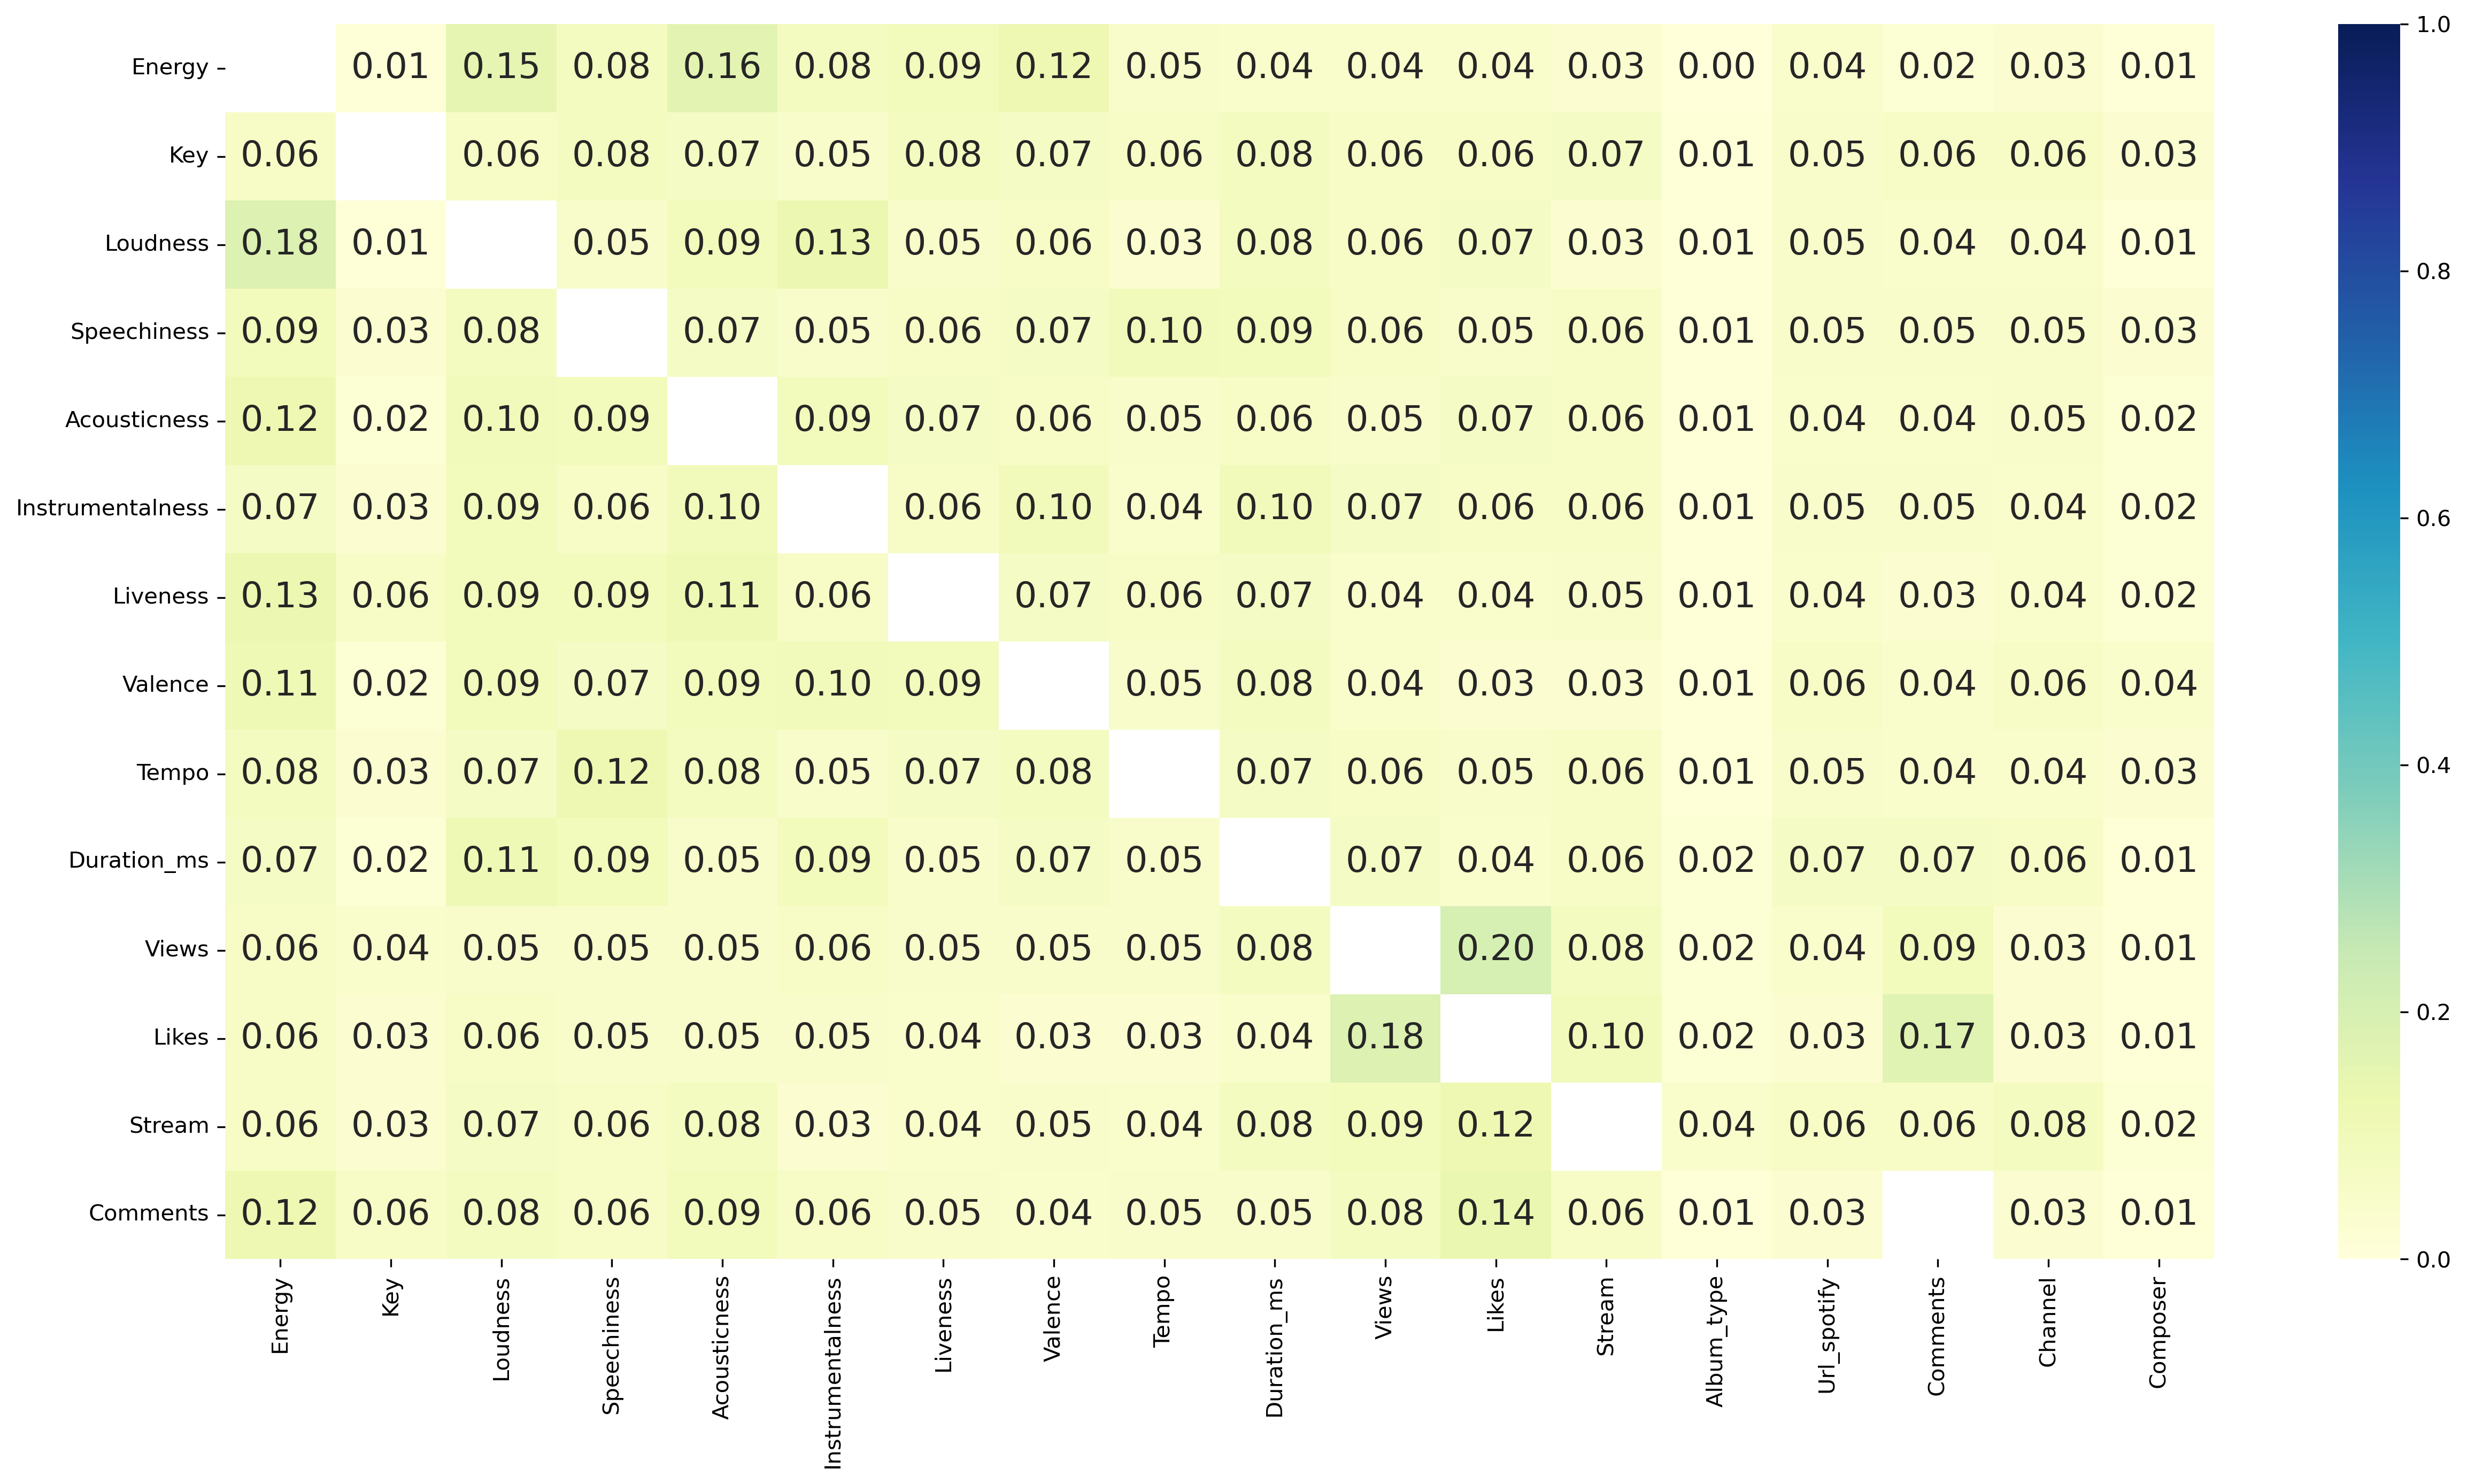

In [252]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
kds.plot_feature_importance(dataset=0, annot=True,cmap="YlGnBu",vmin=0, vmax=1)

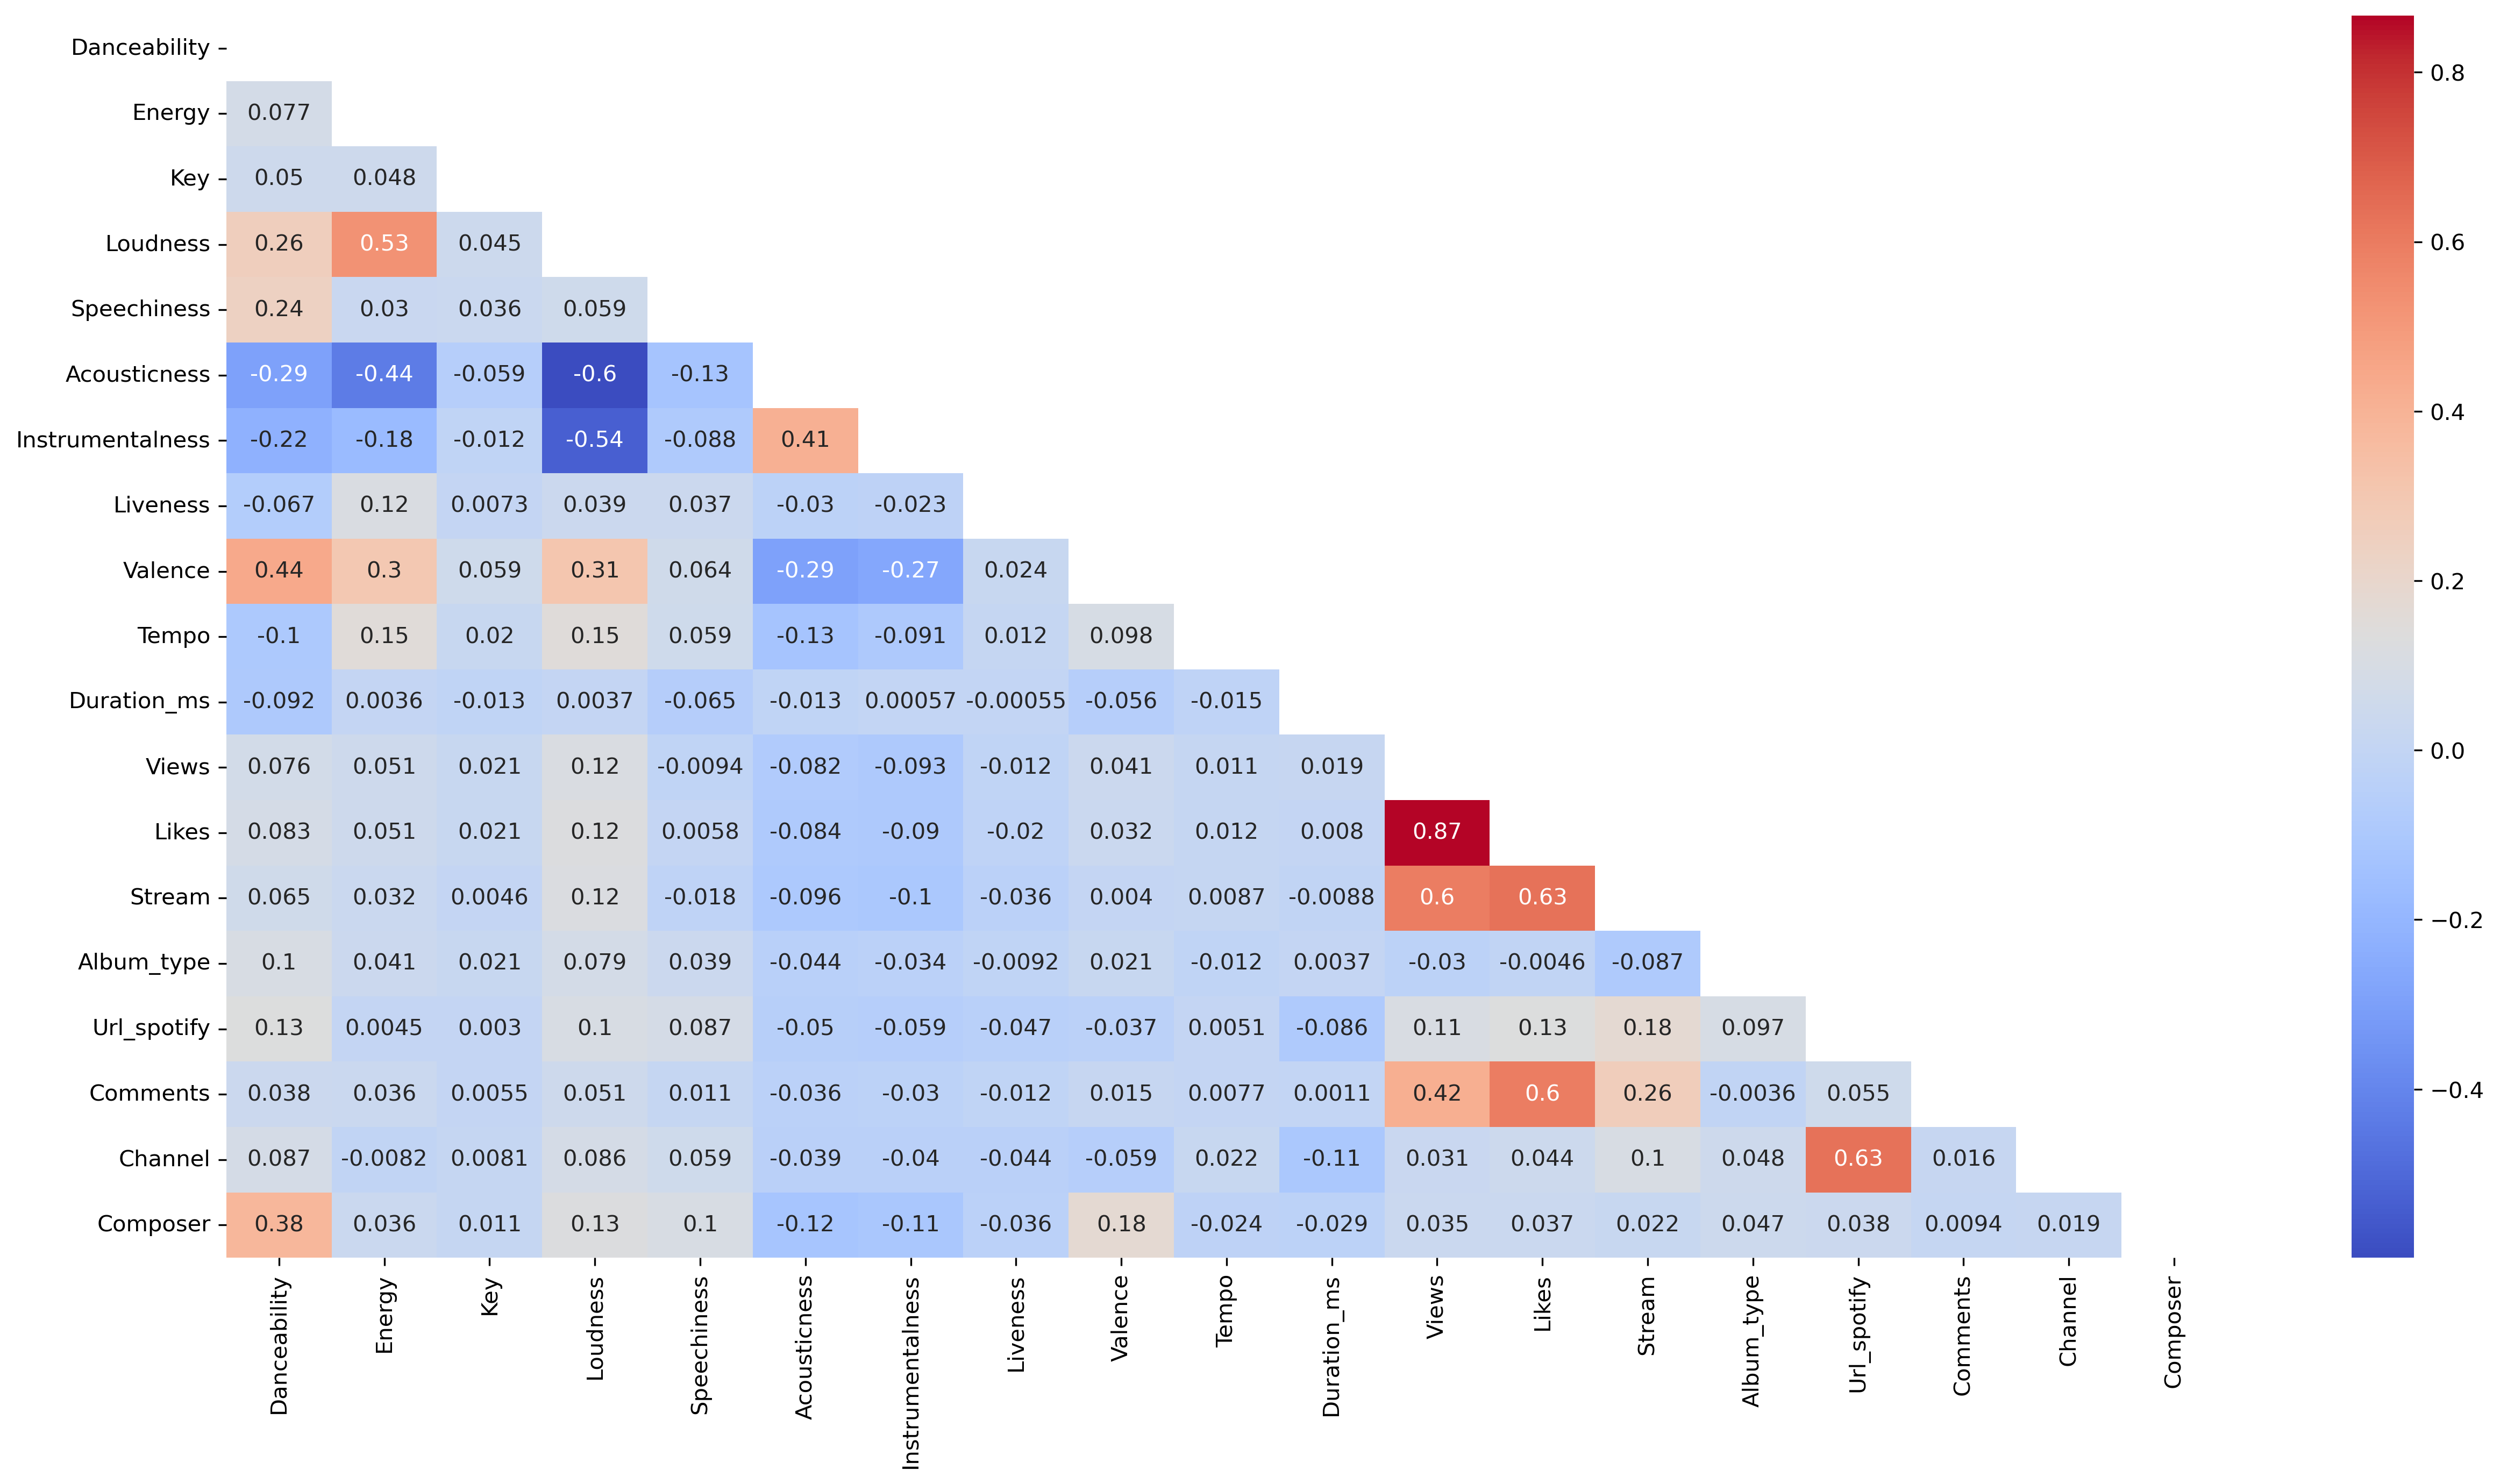

In [38]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(totalImputationTestkds.corr()))
dataplot = sns.heatmap(totalImputationTestkds.corr(), cmap="coolwarm", annot=True, mask=mask)

In [40]:
totalImputationTestkds.isnull().sum(0)

Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Views               0
Likes               0
Stream              0
Album_type          0
Url_spotify         0
Comments            0
Channel             0
Composer            0
dtype: int64